# 匯入一些套件還有匯入文檔

In [61]:
%pylab inline
import time
import re
import matplotlib.pyplot as plt
import pandas as pd
import string
import codecs
import os
import jieba
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
from sklearn import naive_bayes as bayes
from sklearn.model_selection import train_test_split
#簡轉繁
from hanziconv import HanziConv

#ham與spam的每封郵件list
ham_text = []
spam_text = []
#ham與spam的數據集
ham_data = []
spam_data = []
#取得目前工作目錄
SaveDirectory = os.getcwd() 
#獲得文檔列表
listham = os.listdir(SaveDirectory+'\\data\\normal')
listspam = os.listdir(SaveDirectory+'\\data\\spam')
#數據集數量

print('spam total：',len(listspam))
print('ham total：',len(listham))


Populating the interactive namespace from numpy and matplotlib
spam total： 7775
ham total： 7063


C:\Users\zxc98\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['text', 'f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# 先匯入HAM文檔並給予label = 0

In [62]:
for fileName in listham:
        with open('data/normal/'+fileName, 'r',encoding='gbk') as f:
            #文本每一列儲存
            text=[]
            # 過濾非中文字符，正規化
            for line in f.readlines():
                pattern = re.compile('[^\u4e00-\u9fa5]') #正規化(去除非中文字符)
                line = pattern.sub("", line) #將其他字符取代為""
                content = line.strip().split() #去除一些空白.換行
                text = text+content #儲存這個文本的內容
            text = " ".join(text) #將文本內容list加入全部文本的list
            ham_text.append(HanziConv.toTraditional(text)) #簡轉繁
ham_data = pd.DataFrame(ham_text,columns=['text']) #將list改成dataframe
ham_data['label']='0' #將資料類別加上 0:ham 1:spam
ham_data.head()


,text,label
0,這事兒還有續集 因為我姐她們買房子後來裝修的時候沒錢她婆婆他們就贊助瞭萬塊 這下一吵她婆婆就...,0
1,越發覺得這個姐夫不錯瞭 那萬還是趕緊還瞭吧 標題姐姐快要生孩子瞭很感慨 發信站水木社區站內 ...,0
2,或許某些農村吧 在一個當性彆勞動力富裕程度的地方還是可以理解的 標題姐姐快要生孩子瞭很感慨 ...,0
3,最近經常看到你說一些很武斷的話 所謂保胎確實是要躺在床上不能動的尤其是先兆流産有齣血的時候 ...,0
4,他們分手是說性格不閤 沒多久然後我們交往 還算比較愉快 當初因為他經常和聯係我曾跟他吵過多次...,0


# 先匯入SPAM文檔並給予label = 1

In [63]:
for fileName in listspam:
        with open('data/spam/'+fileName, 'r',encoding='gbk') as f:
            text=[]
            # 过滤掉非中文字符
            for line in f.readlines():
                pattern = re.compile('[^\u4e00-\u9fa5]')
                line = pattern.sub("", line)
                content = line.strip().split()
                text = text+content
            text = " ".join(text)
            spam_text.append(HanziConv.toTraditional(text))
spam_data = pd.DataFrame(spam_text,columns=['text'])
spam_data['label']='1'
spam_data.head()

,text,label
0,會員注冊邀請書 全國最低價域名空間大放送 國際頂級域名注冊驚暴價元年元年連續注冊年以上 國傢...,1
1,你好 以茶會友以茶聯誼喝茶就喝安溪鐵觀音 本廠是專業生産批發各等級鐵觀音茶葉的購買聯係 在綫...,1
2,尊敬的先生小姐 您好 首先感謝您抽時間查看以下信息 我公司一直緻力於研發生産銷售施工環氧樹脂...,1
3,先生 你好 批發麻醉藥催情藥墮胎藥避孕藥飲料型噴霧型香煙型揮發型等各類國際國內製藥企業推齣的...,1
4,貴公司負責人經理財務您好 我是深圳市創偉實業有限公司的我司實力雄厚有著良 好的社會關係也有部...,1


# 把匯入的 SPAM與HAM結合並打亂

In [64]:
all_data = pd.concat([spam_data,ham_data],axis=0, ignore_index=True)  #將ham lsit與spam list串起來
all_data = all_data.sample(frac=1).reset_index(drop=True) #sample frac = 1 是把數據都打亂 resr_index是把index也重設
print('data shape：',all_data.shape)
print('spams in rows：',all_data.loc[all_data['label']=="1"].shape[0])
print('hams in rows：',all_data.loc[all_data['label']=="0"].shape[0])
all_data.head(6)

data shape： (14838, 2)
spams in rows： 7775
hams in rows： 7063


,text,label
0,貴公司負責人經理財務您好 我是深圳市金利嘉實業有限公司因全國各地分公司的進項較多現完成不瞭每...,1
1,貴公司負責人經理財務您好 深圳市昌隆有限公司受多傢公司委托嚮外低點代開部分增值稅電腦發票左右...,1
2,年最新暢銷圖書特書幾百個品種一律特價書銷售歡迎全國各書商來電來函 索取書目 注明暢銷書 北京...,1
3,以下文字轉載自討論區 發信人命中注定信區 標題請問這是推遲截稿時間嗎 發信站水木社區站內 請...,0
4,不同意 孔雀是我看過的最好的國産片之一 這種電影是需要細細體味的你可以說他情節瑣碎但這就是生...,0
5,這首歌不錯 彌漫的煙霧中我看到你那張憂鬱的臉 你說齣什麼樣的理由啊你與我告彆 是朋友啊是戀人...,0


# 接著載入停詞表及斷詞

In [65]:
#載入 停用詞 (stopwords) 自動過濾掉某些字或詞
stopwords = codecs.open(os.path.join(SaveDirectory+'\data', 'stopwords_tr.txt'), 'r', 'utf-8').read().split('\r\n')
#下面斷詞
processed_texts = []
for text in all_data["text"]:
    words = []
    seg_list = jieba.cut(text) #利用Jieba斷詞
    for seg in seg_list: 
        # isalpha()檢測詞是否由字符組成，且不在停用詞的list中
        if (seg.isalpha()) & (seg not in stopwords):
            words.append(seg)
    sentence = " ".join(words)
    processed_texts.append(sentence)
all_data["text"] = processed_texts #利用過濾且斷好的詞取代文本


# 接著將資料切成訓練及與測試集

In [66]:
#traindate & testdata
train_set, test_set, trainlabel, testlabel = train_test_split(all_data["text"], all_data["label"], test_size = 0.15)

In [67]:
print("train:"+str(len(train_set)))
print("test:"+str(len(test_set)))
trainlabel[trainlabel=='1'].shape

train:12612
test:2226


(6561,)

In [68]:
trainlabel_orig = trainlabel.copy()
# 取消一些標記的數據
unlabeled_size = 2597
#loc可以選擇數據(把上面數量的POSTIVE DATA隱藏為UNLABELED DATA)
trainlabel.loc[
    np.random.choice(
        trainlabel[trainlabel == '1'].index, 
        replace = False, 
        size = unlabeled_size
    )
] = '0'
trainlabel[trainlabel=='1'].shape

(3964,)

In [69]:
positive_train = trainlabel[trainlabel=='1'].index
positive_data = train_set[positive_train]
positive_spam = pd.DataFrame(
    {
     'text':positive_data, 
     'label':trainlabel[positive_train],
     'truth':trainlabel_orig[positive_train]
    })
positive_spam.shape


(3964, 3)

In [70]:
import re
def generate_key_list(all_data, size_table=200,ignore=2):
    dict_spam_raw = dict()
    dict_genuine_raw = dict()
    dict_IDF = dict()

    # 去除字母外的所有內容.
    for i in range(all_data.shape[0]):
        finds = all_data.iloc[i].text.split(" ")
        if all_data.iloc[i].label == '1':
            for find in finds:
                if len(find)<ignore: continue
                try:
                    dict_spam_raw[find] = dict_spam_raw[find] + 1
                except:	
                    dict_spam_raw[find] = dict_spam_raw.get(find,1) #若是新的文字因為後面get找不到這個索引會返回逗點後面的值
                    dict_genuine_raw[find] = dict_genuine_raw.get(find,0)
        else:
            for find in finds:
                if len(find)<ignore: continue
                try:
                    dict_genuine_raw[find] = dict_genuine_raw[find] + 1
                except:	
                    dict_genuine_raw[find] = dict_genuine_raw.get(find,1)
                    dict_spam_raw[find] = dict_spam_raw.get(find,0)

        word_set = set()
        for find in finds:
            if not(find in word_set):
                if len(find)<ignore: continue
                try:
                    dict_IDF[find] = dict_IDF[find] + 1
                except:	
                    dict_IDF[find] = dict_IDF.get(find,1)
            word_set.add(find)
    word_df = pd.DataFrame(list(zip(dict_genuine_raw.keys(),dict_genuine_raw.values(),dict_spam_raw.values(),dict_IDF.values())))
    word_df.columns = ['keyword','genuine','spam','IDF']
    word_df['genuine'] = word_df['genuine'].astype('float')/all_data[all_data['label']=='0'].shape[0]
    word_df['spam'] = word_df['spam'].astype('float')/all_data[all_data['label']=='1'].shape[0]
    word_df['IDF'] = np.log10(word_df.shape[0]/word_df['IDF'].astype('float'))
    word_df['genuine_IDF'] = word_df['genuine']*word_df['IDF']
    word_df['spam_IDF'] = word_df['spam']*word_df['IDF']
    word_df['diff']=word_df['spam_IDF']-word_df['genuine_IDF']
    selected_spam_key = word_df.sort_values('diff',ascending=False)  
    keyword_dict = dict()
    i = 0
    for word in selected_spam_key.head(size_table).keyword:
        keyword_dict.update({word.strip():i})
        i+=1
    return keyword_dict   
# build a tabu list based on the training data
size_table = 200               # 多少特徵維度去分類SPAM
word_len_ignored = 2            # 忽略那些比這個還要小的字詞
keyword_dict=generate_key_list(positive_spam, size_table, word_len_ignored)

In [71]:
#排序越前面的代表出現在SPAM的機率越大
for key,value in keyword_dict.items():
    print('{key}:{value}'.format(key = key, value = value))

加密:0
一個:1
窗口:2
是否:3
接受:4
安全:5
證書點擊:6
直銷:7
精雕:8
油泥:9
泥六層:10
英泥:11
模具:12
雕塑:13
羥基:14
矽油:15
二甲基:16
水溶性:17
常溫:18
下質:19
堅硬:20
細琢適:21
精品:22
原型:23
工業:24
設計:25
模型:26
敏感:27
微溫:28
軟化:29
塑形:30
修補:31
薄片:32
泥土:33
手溫:34
即可:35
簡便適:36
教室:37
教學:38
習作:39
沾手:40
不收縮:41
比目:42
結土:43
乾淨:44
精密:45
精密度:46
高是:47
工藝:48
品業:49
材料:50
規格:51
包裝:52
片片:53
實用:54
技術:55
轉讓:56
沙岩:57
列技術:58
軟陶:59
雕像:60
免水:61
洗手:62
劑技術:63
樹脂:64
雕花:65
成型:66
肥皂:67
公司:68
網站:69
人謝:70
小姐:71
電話:72
傳真:73
郵箱:74
業務:75
負責人:76
經理:77
財務:78
您好:79
華隆源:80
實業:81
有限公司:82
廣州:83
東莞:84
分公司:85
我司:86
實力:87
雄厚:88
有著:89
良好:90
社會關:91
進項:92
多現:93
完成:94
每月:95
售額度:96
一部分:97
增值:98
稅電腦:99
發票:100
海關:101
繳款:102
左右:103
普通商品:104
銷售稅:105
電腦:106
運輸:107
廣告:108
租賃業:109
服務業:110
優惠代開:111
作點:112
數較:113
低還:114
數量:115
額度:116
大小:117
商討優:118
點數:119
成立:120
多年:121
一直:122
堅持:123
以誠信:124
中心:125
核心思想:126
牢固:127
樹立:128
形象:129
真正:130
做到:131
閤作:132
一次:133
永久:134
朋友:135
鄭重:136
承諾:137
所用:138
真票:139
希望:140
能夠:141
機會:142
貴司:143
如貴司:144
疑慮:145
擔心:146
可上:147
網查證:148
直接:149
稅務局:150
抵扣:151
核對:152
信息:15

In [72]:
unlabeled_train = trainlabel[trainlabel=='0'].index
unlabeled_data = train_set[unlabeled_train]
unlabeled_df = pd.DataFrame(
    {
        'text':unlabeled_data, 
        'label':trainlabel[unlabeled_train],
        'truth':trainlabel_orig[unlabeled_train]
    })
unlabeled_df.head()

,label,text,truth
9795,0,放棄 月相 識然 後 算是 一見 鍾 情 瞭 後 月 裏 暗示 隱約 明示 大聲 錶 排斥 ...,0
1789,0,姐夫 拍桌子 瞭 姐 還梗 胎兒 超 男的誤 判成 女 女的誤 判成 男 原因 超看 第一性...,0
1787,0,背景 參考 問下 錶 拒絕 是不是 瞭 發信 人 小 小 信區 標題 問下 錶 拒絕 是不是...,0
12967,0,項目 管理者 聯盟 招聘 內容 編輯 一名 歡迎 傢 幫忙 推薦 工作 地點 北京市 德勝門...,0
5867,0,企業 短信 群發適 閤 慶典 通告 商品 促銷彈 指間將 信息 發到 數萬 客戶 手機 快捷...,1


In [73]:
all_data = pd.concat([positive_spam,unlabeled_df],axis=0, ignore_index=False)  #將ham lsit與spam list串起來
all_data = all_data.sample(frac=1) #sample frac = 1 是把數據都打亂
all_data.head(10)


,label,text,truth
13844,0,您好 是廣 州市 實達 貿易 有限公司 現有 剩餘廣告 運輸 服務 商品 普通 發票 代開 ...,1
878,0,姑姑 是不是 奶奶 生 姑姑 孝順 媽媽關 係 好 好象 很小 知道 瞭 教育 問題 同學 ...,0
9718,1,專營 外貿 品牌 服飾 每一件 品牌 服飾 眼光 下 挑 選質量 保證 如有 質量 問題 包...,1
14510,0,公司 負責人 經理 財務 您好 昌隆 實業 有限公司 國內 部分 省市 設有 分公司 我司 ...,1
14793,1,緻 公司 負責人 財務 經理 您好 公司 受多 傢 公司 委托 可代開 手 寫 電腦 發票 ...,1
14070,1,尊敬 客戶 您好 方便 企事業 單位 公司 長 期承辦 以下 業務 需要 請聯 係 暫時 需...,1
5632,1,公司 負責人 經理 財務 您好 源順 實業 有限公司 廣州 東莞 市 分公司 我司 實力 雄...,1
6908,1,金屬 加工 刀具 夾具 應用 調 查 韆 人 統 計 結 果 金屬 加工 刀具 夾具 調查 ...,1
10244,0,推理 發現 整天 加班 工作 浪費 生命 標題 越來 越 發現 談戀 愛無 聊得 很浪費 生...,0
14555,1,激情 光盤 精美 包裝 清純 美少女 激情 床上 秀 熱血沸騰 無限暇 想 泰國 少男少女 ...,1


In [74]:
# all_data.loc[positive_train[:]]
all_data['truth'] = trainlabel_orig
all_data['label'][all_data['label']=="1"].shape

(3964,)

In [75]:
 all_data['label'][all_data['label'] == '1'].shape

(3964,)

In [76]:
unlabeled_size = 1200
sp_index=[]
sp_index = all_data['label'].loc[
    np.random.choice(
        all_data['label'][all_data['label'] == '1'].index, 
        replace = False, 
        size = unlabeled_size
    )
].index
sp_index
# all_data.loc[positive_train[:]]

Int64Index([14552,  4418,  9739,  4647, 11665,  7380,  8290,  3365, 11960,
             4857,
            ...
             1634,  9915,  5527,  7353,  5158, 12763, 14327,  4066,  4739,
             2464],
           dtype='int64', length=1200)

In [77]:
all_data['label'].loc[sp_index[:]] = 0 #SP
all_data['label'].loc[sp_index[:]].shape


(1200,)

# -------------------------------SP  上面

In [78]:
def convert_Content(text, keyword_dict):
    #判斷是否有此特徵
    m = len(keyword_dict) #維度數量
    res = np.int_(np.zeros(m)) #建置一個幾維度的向量
    finds = text.split(" ") #將文本內容切割(類似中文斷詞)
    for find in finds:
        try:
            #若比對完有此特徵則特徵改為1
            i = keyword_dict[find] 
            res[i]=1
        except:
            continue
    return res
def raw2feature(all_data,keyword_dict):
    n_all_data = all_data.shape[0]
    m = len(keyword_dict)
    X_all_data = np.zeros((n_all_data,m));
    Y_all_data = np.int_(all_data.label=='1')
    for i in range(n_all_data):
        X_all_data[i,:] = convert_Content(all_data.iloc[i].text, keyword_dict)
    return [X_all_data,Y_all_data]
     
all_data_matrix=raw2feature(all_data,keyword_dict)

In [79]:
# positive_train  正樣本的index
# unlabeled_train 未標記樣本的index
# all_train 混合完的index
all_data_matrix[1][all_data_matrix[1]==1].shape

(2764,)

# 使用NB計算他們的機率

In [80]:
# 使用一般的算法
from sklearn.naive_bayes import GaussianNB
model_NB = GaussianNB(priors=None)
model_NB.fit(all_data_matrix[0], all_data_matrix[1])
# 儲存次方法給定的分數
results = pd.DataFrame({
    'truth'      : all_data['truth'],   # 真實標籤
    'label'      : all_data['label'],        # 預測標籤
    'output_std' : model_NB.predict_proba(all_data_matrix[0])[:,0],   # 隨機森林分數(求屬於標籤1的概率)
}, columns = ['truth', 'label', 'output_std'])
# print(results)

In [81]:
results.loc[sp_index[:]].head()


,truth,label,output_std
14552,1,0,7.295797e-03
4418,1,0,1.000000e+00
9739,1,0,1.000000e+00
4647,1,0,1.495599e-96
11665,1,0,1.000000e+00


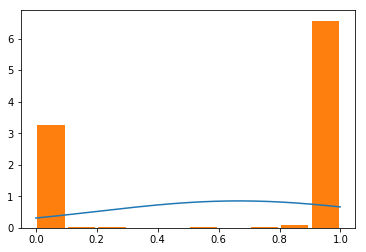

(398,)


In [82]:
from scipy import stats
sp_data = results['output_std'].loc[sp_index[:]]
sp_counts = len(results['output_std'].loc[sp_index[:]])
sp_mean = results['output_std'].loc[sp_index[:]].mean()
sp_std = results['output_std'].loc[sp_index[:]].std()
# 绘制概率密度分布图
x = np.arange(0, 1, 0.001)
# PDF是概率密度函数
y = stats.norm.pdf(x, loc=sp_mean, scale=sp_std)
plt.plot(x, y)
plt.hist(sp_data, bins=10, rwidth=0.9, normed=True)
plt.show()
print(results['output_std'].loc[sp_index[:]][results['output_std']<0.5].shape)

In [83]:
from scipy import stats
ci = 0.68
for i in range(11):
    conf_intveral = stats.norm.interval(ci, loc=sp_mean, scale=sp_std) #數字為信賴區間
    ci += 0.02
    print(conf_intveral)
    t=[]
    t = sp_data[sp_data<conf_intveral[1]]
    t = t[t>conf_intveral[0]]
    RN = results
    RN = RN[(~RN.index.isin(sp_index))] #去除U中的SP
    RN_index = RN['output_std'][RN['output_std']>=max(t)].index
    print(1-np.int_(RN['truth'].loc[RN_index[:]]).mean())
    
    
# 函数曲线下68.268949%的面积在平均数左右的一个标准差范围内

# 函数曲线下95.449974%的面积在平均数左右两个标准差的范围内

# 函数曲线下99.730020%的面积在平均数左右三个标准差的范围内

# 函数曲线下99.993666%的面积在平均数左右四个标准差的范围内

(0.20121484061077144, 1.1318614997187866)
0.6682986536107711
(0.18157380535570344, 1.1515025349738544)
0.6682986536107711
(0.16103884119664003, 1.1720374991329179)
0.6682986536107711
(0.13948108771427903, 1.193595252615279)
0.6682986536107711
(0.11674237137090071, 1.2163339689586574)
0.6682986536107711
(0.09262532956771463, 1.2404510107618434)
0.6682986536107711
(0.0668789472426311, 1.266197393086927)
0.6682986536107711
(0.03917666302950251, 1.2938996773000553)
0.6682986536107711
(0.009081893992830326, 1.3239944463367277)
0.6682986536107711
(-0.024008917401944996, 1.357085257731503)
0.6682986536107711
(-0.06096616959202583, 1.3940425099215836)
0.6682986536107711


In [84]:
max(sp_data)

1.0

In [85]:
t = sp_data[sp_data<conf_intveral[1]]
t = t[t>conf_intveral[0]]
max(t)

1.0

In [86]:
results.loc[sp_index].shape

(1200, 3)

In [87]:
RN = results
RN = RN[(~RN.index.isin(positive_train))] #去除全部中的SP.P剩下U
RN_index = RN['output_std'][RN['output_std']>=max(t)].index
1-np.int_(RN['truth'].loc[RN_index[:]]).mean()

0.8070411179790379

In [88]:
RN_index.shape

(7442,)

# 下面是將test資料轉換為矩陣

In [89]:
test_data = pd.DataFrame({
    'text'      : test_set,   # 真實標籤
    'label'      : testlabel,        # 預測標籤
}, columns = ['text', 'label'])

In [90]:
#將測試及轉為稀疏矩陣，是舊的TFIDF
test_data_matrix = raw2feature(test_data,keyword_dict)

In [91]:
def test_func(test,testlabel,model):
    Y_hat = model.predict(test)
    n=np.size(testlabel)
    print ('Testing Accuarcy: {:.2f}％ ({})'.format(sum(np.int_(Y_hat==testlabel))*100./n,model.__module__))
# Test Model using testing data

test_func(test_data_matrix[0],test_data_matrix[1],model_NB)

Testing Accuarcy: 63.97％ (sklearn.naive_bayes)


# 下面是提取RN後用P和RN重新訓練

In [92]:
all_data.loc[positive_train]
all_data.loc[RN_index]
all_data['label'].loc[sp_index] = '1'
new_all_data=[]
new_all_data = pd.concat([all_data.loc[positive_train],all_data.loc[RN_index]])

In [93]:
new_keyword_dict=generate_key_list(all_data, size_table, word_len_ignored) #TFIDF

In [94]:
new_all_data_matrix = raw2feature(new_all_data,keyword_dict)
from sklearn.naive_bayes import GaussianNB
NBPU = GaussianNB(priors=None)
NBPU.fit(new_all_data_matrix[0], new_all_data_matrix[1])

GaussianNB(priors=None, var_smoothing=1e-09)

In [95]:
test_func(test_data_matrix[0],test_data_matrix[1],NBPU)

Testing Accuarcy: 70.71％ (sklearn.naive_bayes)


In [96]:
all_data['label'][all_data['label']=="1"].shape

(3964,)

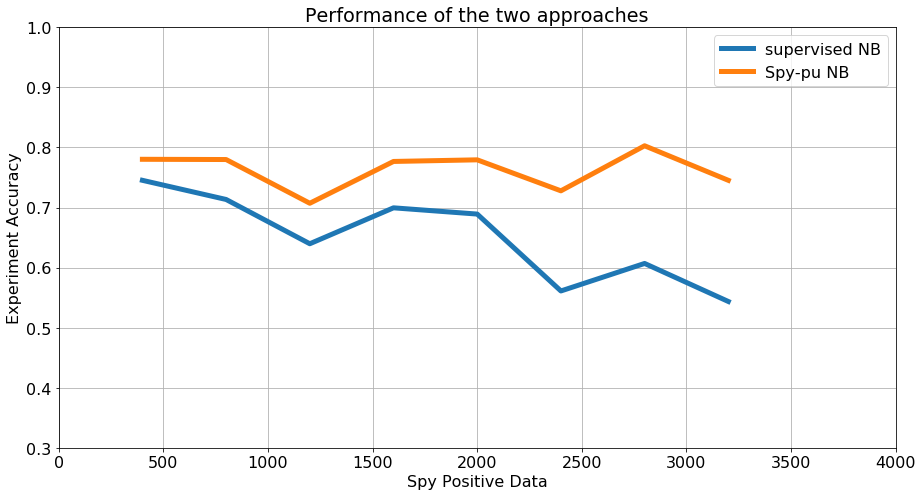

In [99]:
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 15, 8
x = [400, 800, 1200, 1600,2000,2400,2800,3200]
y_std = [0.7453, 0.7134, 0.6397, 0.6995,0.6891,0.5611,0.6069,0.5436]
y_stdpu = [0.7803, 0.7799, 0.7071, 0.7767,0.7794,0.7278,0.8028,0.7453]
plt.xlim(0, 4000)
plt.ylim(0.3, 1)
plt.plot(x, y_std, marker='', mec='b', mfc='w' ,lw = 5)
plt.plot(x, y_stdpu, marker='', mec='b', mfc='w' ,lw = 5)
plt.legend([
    'supervised NB', 
    'Spy-pu NB'
])  # 让图例生效
# plt.xticks(x, names, rotation=45)
plt.margins(0)
plt.subplots_adjust(bottom=0.15)
plt.xlabel(u"Spy Positive Data") #X轴标签
plt.ylabel("Experiment Accuracy") #Y轴标签
plt.title("Performance of the two approaches") #标题
plt.savefig("NBPU ")
plt.grid()
plt.show()